## ESADE MIBA Artifitial Intelligence Final Project 
### Team Magic Leap (formerly known as Team WWDC 2017)

#### Team Member: Nancy Xiaowen Jiang, Che-Min Tsai, Lifu Zuo

##### Agenda
1. Define the digital event 
2. Definition of the problem (comment lines will be added later in the following notebooks)
3. Scrap the data
4. Clean the dataset (Including Topic analysis)
5. Identify several types of users using different methods
6. Propose a variable for a selected variable that is easy to explain to a decision-maker
7. Propose a variable for the same selected variable that is as accurate as possible

#### In this notebook, we will cover Part 5

Now we will try to identify several types of users with clustering methodologies.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Load the dataset
First of all, we need to create a new clean dataset with only users' information in it, so that we could do further analysis

In [21]:
#Get the cleaned data we have
clean_df = pd.read_csv("C:/Users/maximjxw/Desktop/AI Final Project/clean_data.csv", index_col = 0)
clean_df1 = pd.DataFrame(clean_df)
clean_df1.head()

,full_text,favorite_count,retweet_count,text_number,location,user_followers,user_friends,user_listed,user_favourites_count,user_statuses_number,Is_this_a_retweet,retweet_fulltext,tweet_create_date,tweet_create_time,user_create_date,user_create_time
0,People are freaking out over the @magicleap pr...,0,0,105,"New York, NY",2323200,4026,44594,7814,174691,0,0,2017-12-20,19:30:22,2007-3-28,22:39:21
1,Google’s Magic Leap Just Revealed An Impressiv...,0,0,73,NaN,0,128,0,1,9,0,0,2018-1-01,00:16:42,2017-12-03,21:11:06
2,"RT @magicleap: World, meet Magic Leap One. Mag...",0,1570,131,Vancouver,1007,1231,32,1567,4990,1,"World, meet Magic Leap One. Magic Leap One, me...",2017-12-20,19:30:24,2011-6-05,20:55:09
3,"After 6 years and $1.9 billion in funding, sec...",0,0,110,"Baketown California, USA",15560,4199,162,26350,32491,0,0,2017-12-20,19:30:13,2010-11-20,03:40:07
4,"Here it is, people, the @magicleap One: https:...",0,0,87,"San Francisco, CA",169,208,133,77,1993,0,0,2017-12-20,19:30:12,2016-1-21,17:52:00


In [92]:
#clean datasets with only users' information
X_data = clean_df1[['user_followers','user_friends','user_listed','user_favourites_count','user_statuses_number']]
X = np.array(X_data)
print(X[:10])

[[2323200    4026   44594    7814  174691]
 [      0     128       0       1       9]
 [   1007    1231      32    1567    4990]
 [  15560    4199     162   26350   32491]
 [    169     208     133      77    1993]
 [  12603     656     251    3023   14118]
 [     15       1       0       0    1986]
 [     34     142       7      18    1168]
 [   3811    1356     261    1191    4916]
 [   1154     285      19      74   21002]]


#### Before we start training, we could try to identify how many users' clusters we are supposed to have:

In [93]:
# Fit clusters for various numbers of clusters
from sklearn.cluster import KMeans
K = range(1,100)
KM = [KMeans(n_clusters=k, random_state=0).fit(X) for k in K]
centroids = [km.cluster_centers_ for km in KM]   # cluster centroids

In [94]:
# Compute average euclidean distance between each point and its cluster centroid
from scipy.spatial.distance import cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

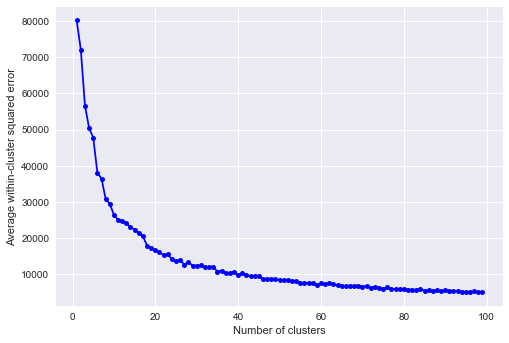

In [95]:
#Plot it
plt.plot()
plt.plot(K, avgWithinSS, 'b.-', ms=10)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.show()

##### Based on the analysis, I think we should categorize all users into 40~60 different types

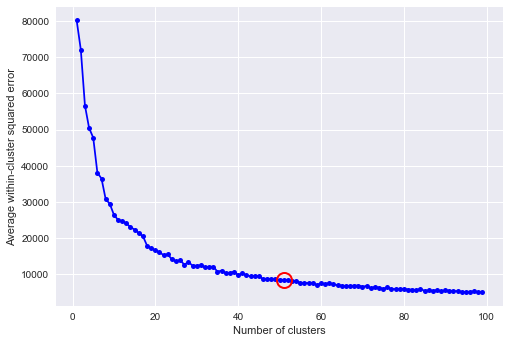

In [114]:
# What is the best number of clusters?
plt.plot()
kIdx = 50 
plt.plot(K, avgWithinSS, 'b.-', ms=10)
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=15, mew=2, mec='r', mfc='None')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.show()

#### Now let's do clustering
First we will explore the dataset, then we will use two different clustering methods: DBSCAN and Spectral clustering to do the analysis

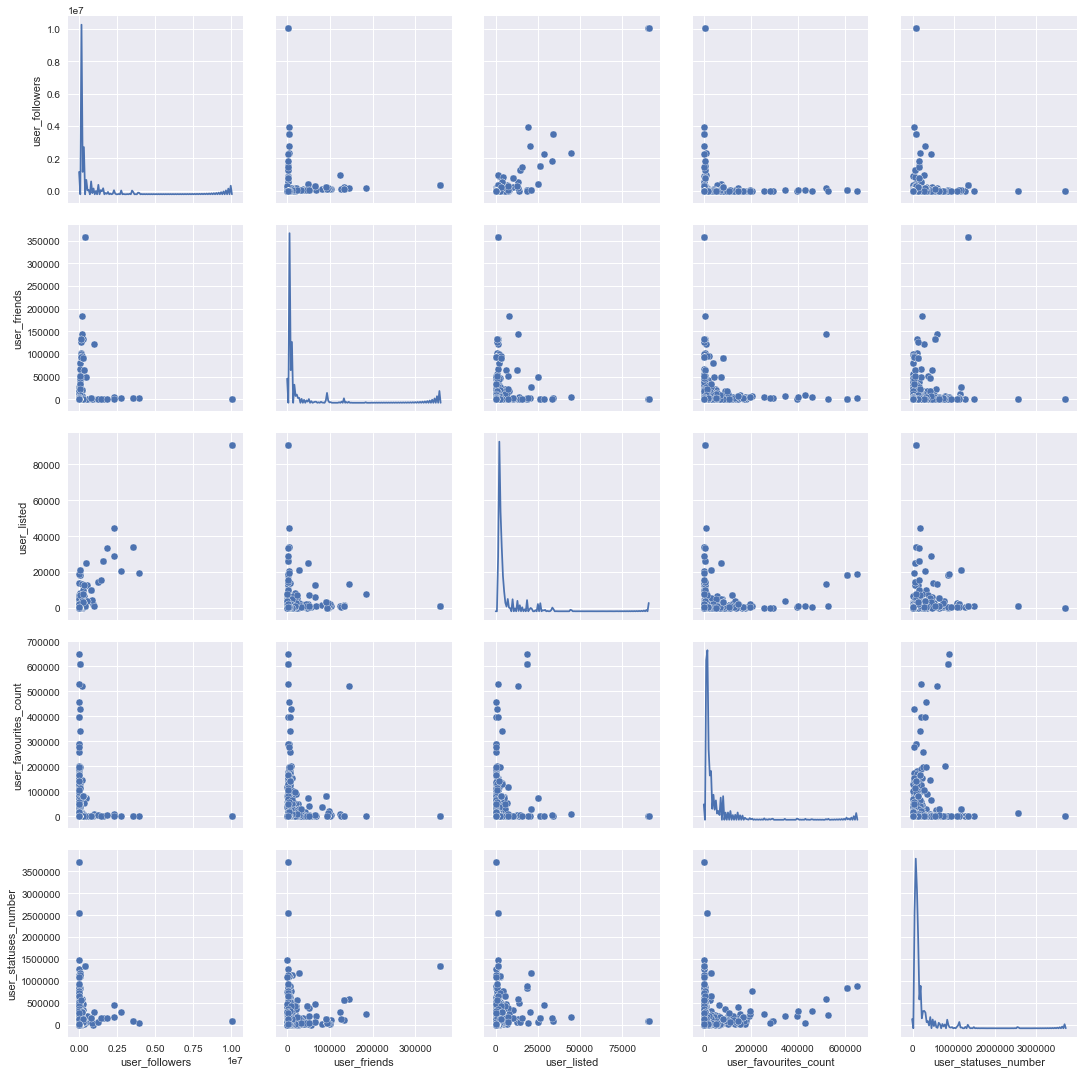

In [98]:
# Explore the dataset
import seaborn as sns
sns.pairplot(X_data, size=3 ,diag_kind="kde")
plt.show()

As we can observe in the graph, with only user followers, friends and other information, it's not easily to do clustering, and we can't see clear trends in the graph.

#### We will use different clustering methods to do user analysis, including:
1. DBSCAN
2. Birch
3. Agglomerative Clustering
4. Mean Shift

First we use DBSCAN Clustering:

D:\PythonSoftware\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Silhoutte score:  -0.77162567185


D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


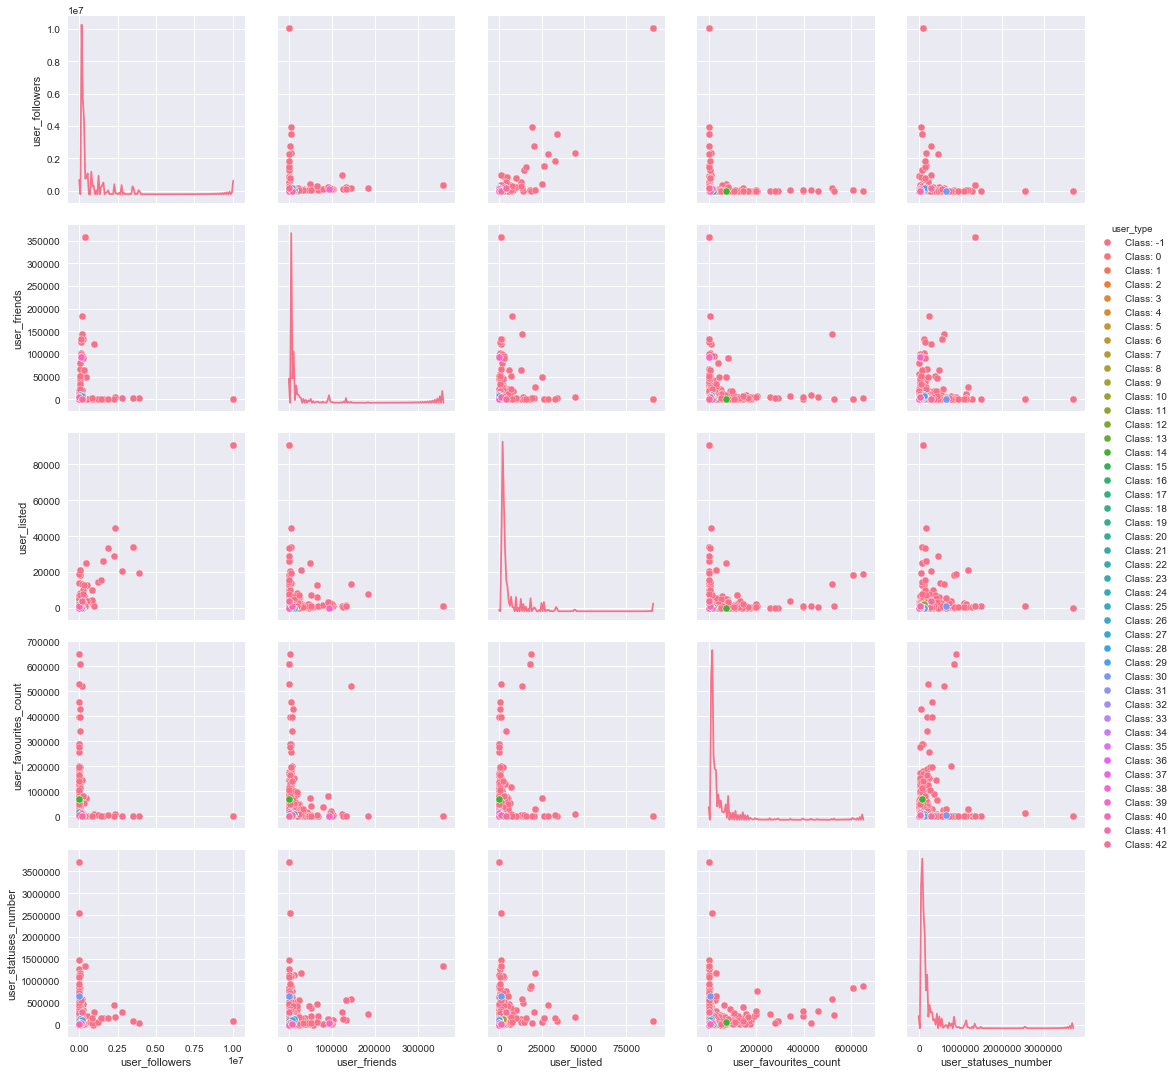

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = DBSCAN().fit(X)
labels = clustering.labels_
X_data.loc[:,'user_type'] = ["Class: " + str(x) for x in labels]

#print ("Adjusted rand score: ", adjusted_rand_score(y, labels) )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean'))
       
sns.pairplot(X_data, hue = 'user_type', size=3 ,diag_kind="kde")
plt.show()

Now we use Birch Clustering:

D:\PythonSoftware\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\PythonSoftware\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Silhoutte score:  0.969914514415


D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


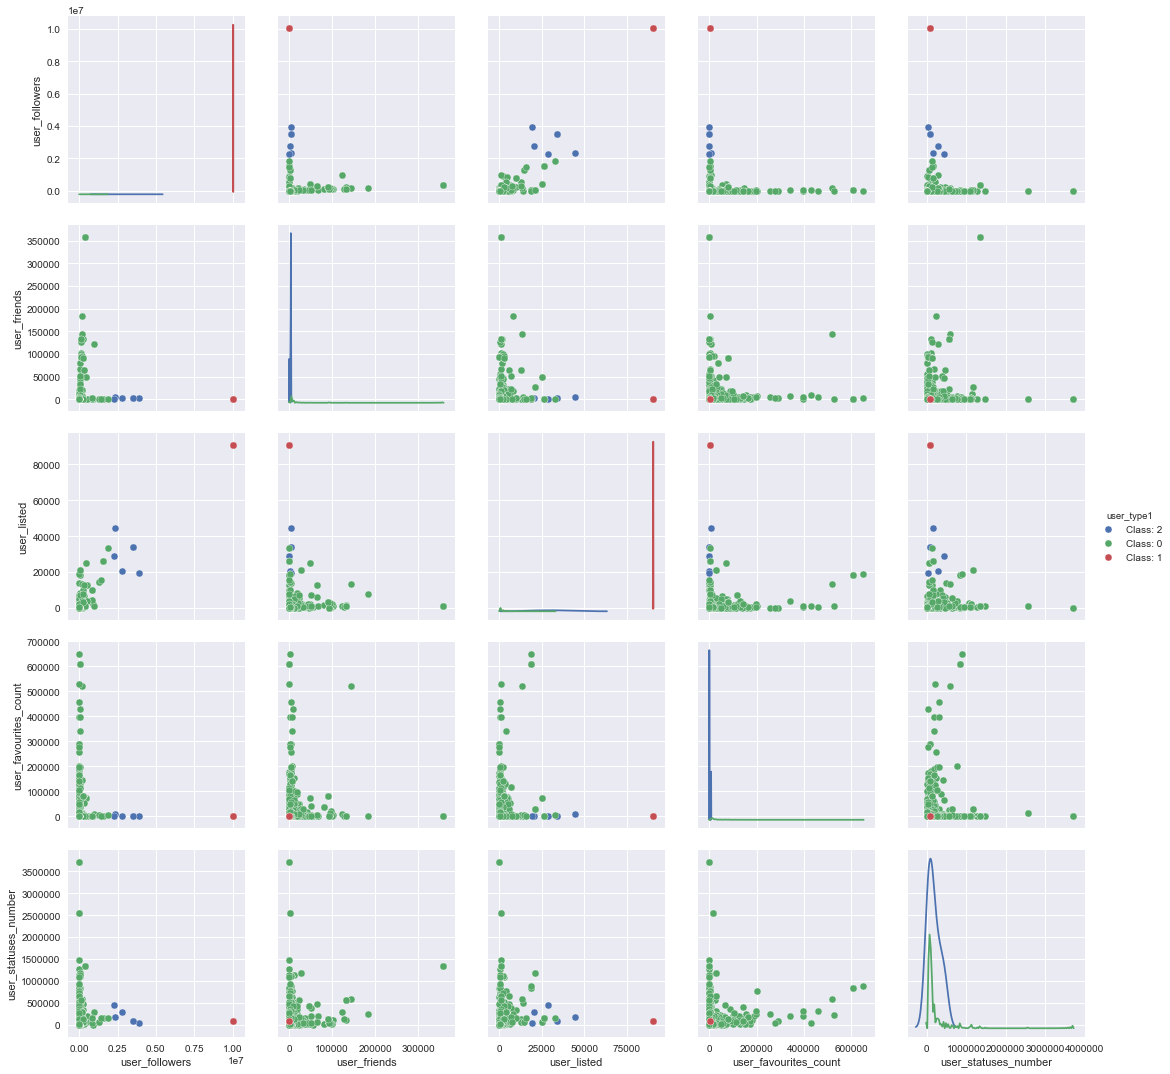

In [109]:
from sklearn.cluster import Birch
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = Birch().fit(X)
labels = clustering.labels_
X_data.loc[:,'user_type1'] = ["Class: " + str(x) for x in labels]

#print ("Adjusted rand score: ", adjusted_rand_score(y, labels)  )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean') )
       
sns.pairplot(X_data, hue="user_type1", size=3 ,diag_kind="kde")
plt.show()

Now we use Agglomerative Clustering:

D:\PythonSoftware\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Silhoutte score:  0.990215002829


D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


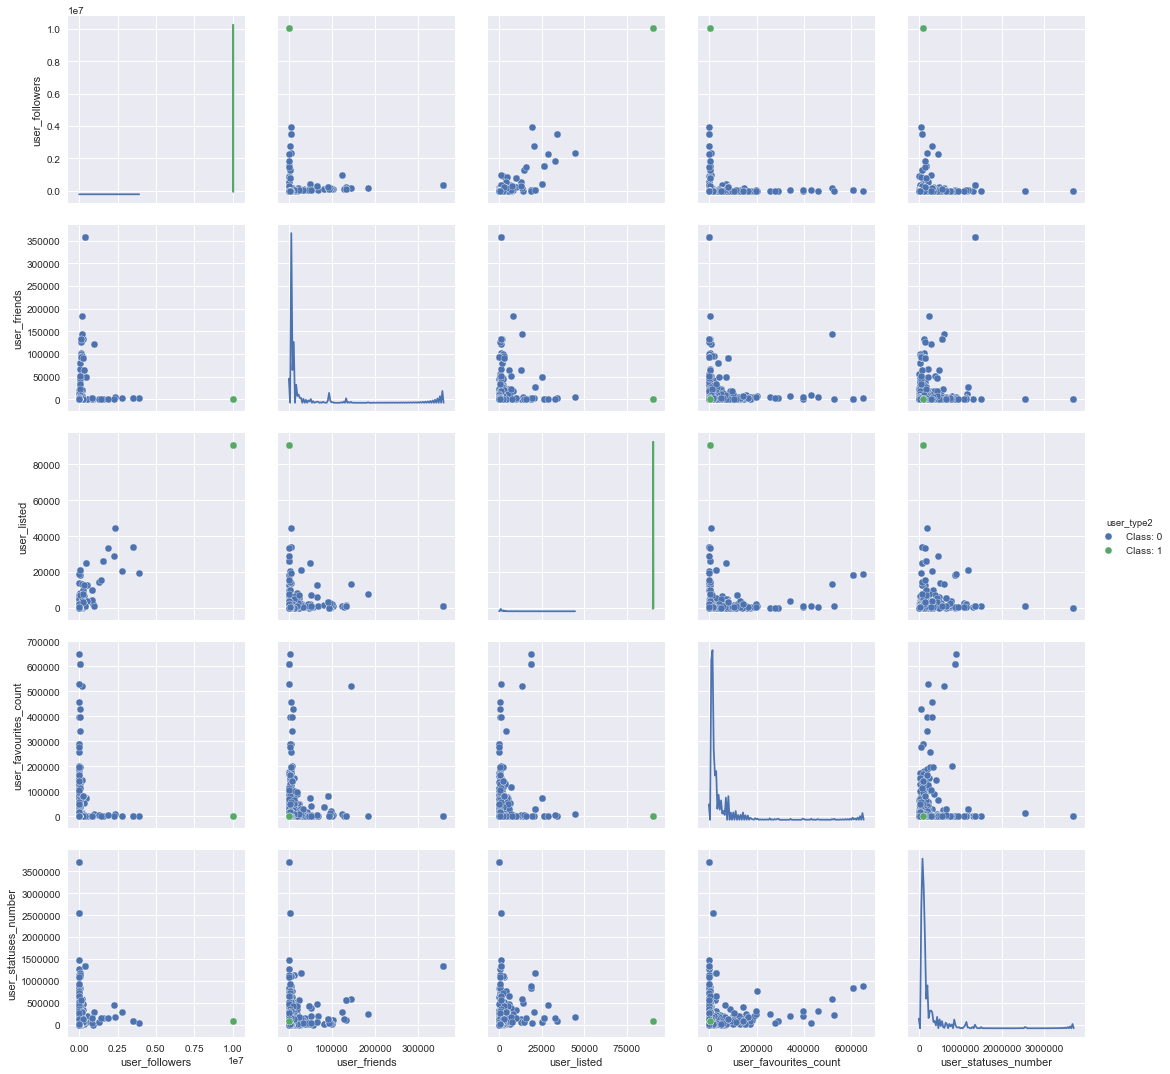

In [111]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = AgglomerativeClustering().fit(X)
labels = clustering.labels_
X_data.loc[:,'user_type2'] = ["Class: " + str(x) for x in labels]

#print ("Adjusted rand score: ", adjusted_rand_score(y, labels)  )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean') )
       
sns.pairplot(X_data, hue="user_type2", size=3 ,diag_kind="kde")
plt.show()

Now we use Meanshift Clustering:

D:\PythonSoftware\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\PythonSoftware\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Silhoutte score:  0.750897231274


D:\PythonSoftware\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\PythonSoftware\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\PythonSoftware\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


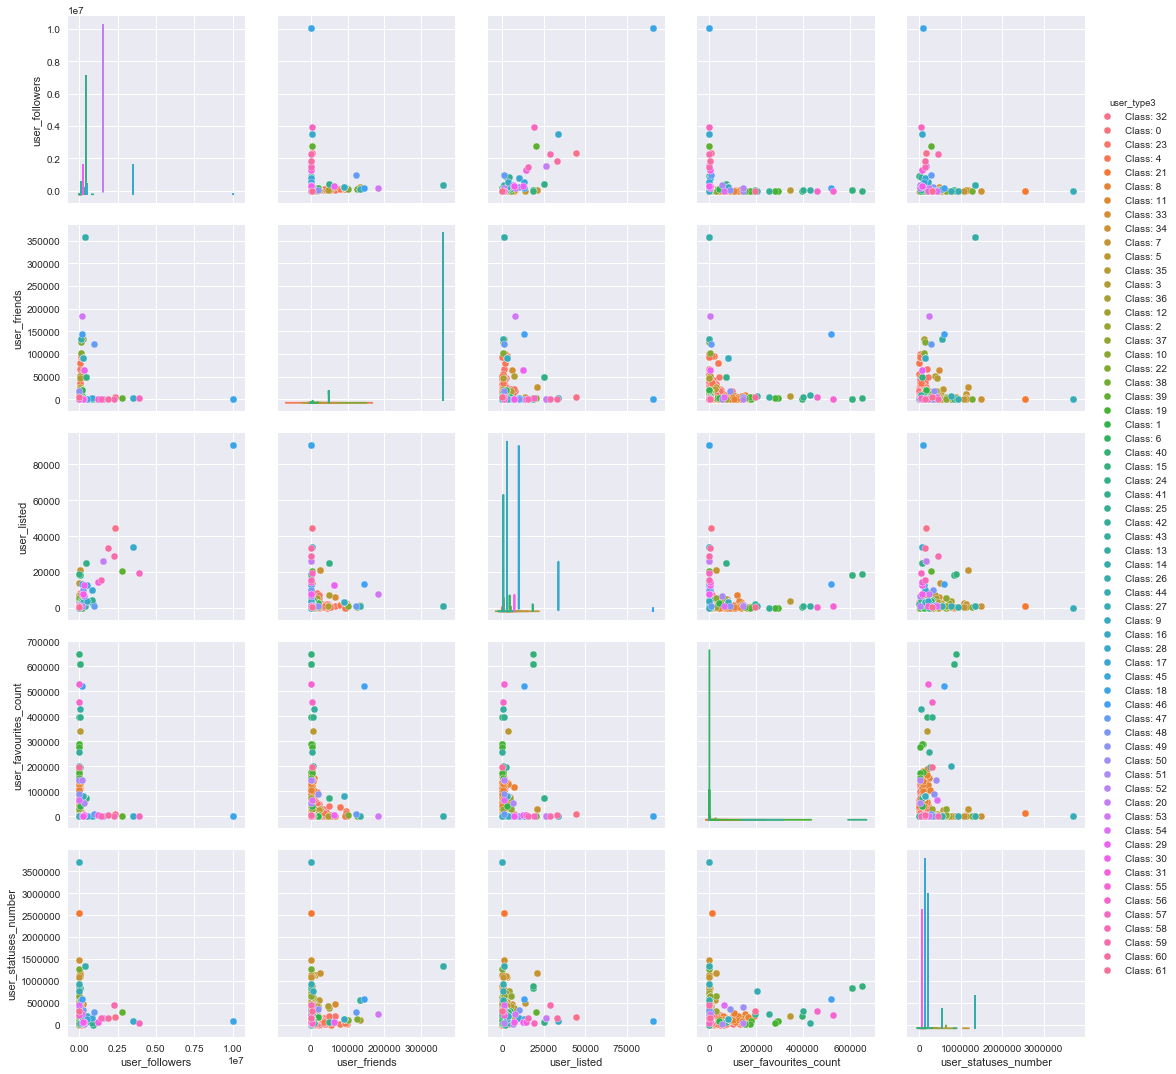

In [113]:
from sklearn.cluster import MeanShift
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = MeanShift().fit(X)
labels = clustering.labels_
X_data.loc[:,'user_type3'] = ["Class: " + str(x) for x in labels]

#print ("Adjusted rand score: ", adjusted_rand_score(y, labels)  )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean') )
       
sns.pairplot(X_data, hue="user_type3", size=3 ,diag_kind="kde")
plt.show()

##### Although Birch and Agglomerative Clustering all have rather high Silhoutte score, it's obviously that they don't have enough clusters and not suit with reality. So we will go with Mean Shift.